# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    if 0 not in arr or arr[-1]==0:
        return print('None')
    b = arr==0
    b = np.roll(b,1)
    b[0] = False
    return max(arr[b])

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    X = X.reshape((1,X.size))
    idx = (np.abs(X-v)).argmin()
    return X[0,idx]

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(x):
    std = x.std(axis=0)
    std[x.std(axis=0) == 0]+=0.00000000001
    x_normed = (x - x.mean(axis=0))/std
    return x_normed

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    if len(X.shape)==2 and X.shape[0]==X.shape[1]:
        det = np.linalg.det(X)
        trace = np.trace(X)
        minim = np.min(X)
        maxim = np.max(X)
        fnorm = np.linalg.norm(X, ord='fro')
        eigenval = np.linalg.eigvals(X)
        try:
            inv = np.linalg.inv(X)
        except:
            inv = 'Вырождена'
        print('детерминант: ',det,"\n след ", trace,"\n минимум ", minim,"\n максимум ",
              maxim,"\n норма Фробениуса", fnorm,"\n собственные числа ", eigenval,"\n обратная матрица \n", inv)
    else:
        print('Не квадратная матрица')

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
def experiment(exp_num):
    np.random.seed(exp_num)#для воспроизводимости
    s = np.random.standard_normal((10, 10))
    return np.max(s@s)

means = []
for exp_num in range(100):
    means.append(experiment(exp_num))
    # Your code here

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   

In [7]:
import pandas as pd
df = pd.read_csv('2008.csv')
# Your code here

   - Имеются ли в данных пропущенные значения?

In [8]:
sum(df.isnull().sum()) #Да

355215

   - Сколько всего пропущенных элементов в таблице "объект-признак"?

355215

   - Сколько объектов имеют хотя бы один пропуск?

In [9]:
sum(df.isnull().any(axis=1)) #все, хотя бы один

70000

   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [10]:
sum(df.isnull().sum()!=0)

16

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?

In [11]:
sum(df['DepDelay'].isnull()) #Да

1399

- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет?

In [12]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
#df.loc[df['DepDelay'].isnull(),]

Для таких объектов отсутствуют все переменные связанные со временем

 Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [13]:
# Your code here
df = df.loc[-df['DepDelay'].isnull(),]
df = df.loc[df['DepDelay']!=0,]

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [14]:
df['DepTime_Minute'] = df['DepTime'].apply(lambda x: str(int(x))[-2:] if not np.isnan(x) else None).astype(int)
df['DepTime_Hour'] = df['DepTime'].apply(lambda x: str(int(x))[:-2] if not np.isnan(x) else 0)
df.loc[df['DepTime_Hour'] == '','DepTime_Hour'] = 0
df['DepTime_Hour'] = df['DepTime_Hour'].astype(int)
del df['DepTime']

In [15]:
df['CRSDepTime_Minute'] = df['CRSDepTime'].apply(lambda x: str(int(x))[-2:] if not np.isnan(x) else None).astype(int)
df['CRSDepTime_Hour'] = df['CRSDepTime'].apply(lambda x: str(int(x))[:-2] if not np.isnan(x) else 0)
df.loc[df['CRSDepTime_Hour'] == '','CRSDepTime_Hour'] = 0
df['CRSDepTime_Hour'] = df['CRSDepTime_Hour'].astype(int)
del df['CRSDepTime']

In [16]:
df['ArrTime_Minute'] = df['ArrTime'].apply(lambda x: str(int(x))[-2:] if not np.isnan(x) else np.nan)
df = df.loc[df['ArrTime_Minute'].isnull() == False,:]
df['ArrTime_Minute'] = df['ArrTime_Minute'].astype(int)
df['ArrTime_Hour'] = df['ArrTime'].apply(lambda x: str(int(x))[:-2] if not np.isnan(x) else 0)
df.loc[df['ArrTime_Hour'] == '','ArrTime_Hour'] = 0
df['ArrTime_Hour'] = df['ArrTime_Hour'].astype(int)
del df['ArrTime']

In [17]:
df['CRSArrTime_Minute'] = df['CRSArrTime'].apply(lambda x: str(int(x))[-2:] if not np.isnan(x) else None).astype(int)
df['CRSArrTime_Hour'] = df['CRSArrTime'].apply(lambda x: str(int(x))[:-2] if not np.isnan(x) else 0)
df.loc[df['CRSArrTime_Hour'] == '','CRSArrTime_Hour'] = 0
df['CRSArrTime_Hour'] = df['CRSArrTime_Hour'].astype(int)
del df['CRSArrTime']

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [18]:
df.drop(['Year', 'TailNum'], axis=1, inplace=True)

In [19]:
corr = df.corr()
corr['DepDelay'].sort_values(ascending=False)

DepDelay             1.000000
ArrDelay             0.933526
LateAircraftDelay    0.553806
CarrierDelay         0.532696
WeatherDelay         0.238872
DepTime_Hour         0.203472
NASDelay             0.171591
CRSDepTime_Hour      0.140416
CRSArrTime_Hour      0.135523
TaxiOut              0.100504
ArrTime_Hour         0.070181
ActualElapsedTime    0.041946
CRSElapsedTime       0.033961
AirTime              0.025237
Distance             0.024078
CRSDepTime_Minute    0.022270
FlightNum            0.021709
TaxiIn               0.020640
SecurityDelay        0.010668
CRSArrTime_Minute    0.009172
DayofMonth           0.008777
DayOfWeek            0.008467
ArrTime_Minute       0.006171
Diverted            -0.002425
DepTime_Minute      -0.017047
Month               -0.029353
Cancelled                 NaN
Name: DepDelay, dtype: float64

In [20]:
df.drop(['ArrDelay','LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay', 'Cancelled','SecurityDelay','CancellationCode'], axis=1, inplace=True)
df.shape

(63264, 23)

**Эти колонки исключены, так как являются частью DepDelay(этим объясняется высокая скоррелированность) и не могут быть известны заранее, то есть быть использованы в предсказании.
Cancelled убрана, так как содержит  только нули**

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

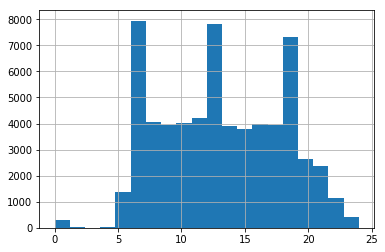

In [252]:
df['DepTime_Hour'].hist(bins=20)

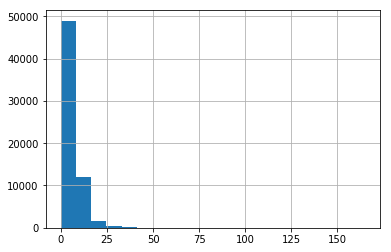

In [253]:
df['TaxiIn'].hist(bins=20)

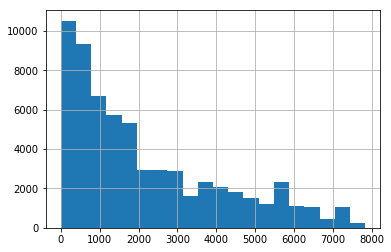

In [254]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
y = df['DepDelay']
X = df.drop(['DepDelay'], axis=1)
def transform_data(df):
    # Define which columns should be encoded vs scaled
    columns_to_encode = ['Month','DayOfWeek', 'UniqueCarrier', 'Diverted']#drop Origin and Dest 
    columns_to_scale  = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
       'Distance', 'TaxiIn', 'TaxiOut', 'DepTime_Minute',
       'DepTime_Hour', 'CRSDepTime_Minute', 'CRSDepTime_Hour',
       'ArrTime_Minute', 'ArrTime_Hour', 'CRSArrTime_Minute',
       'CRSArrTime_Hour']
    df.fillna({x:0 for x in columns_to_scale}, inplace=True)
    df.fillna({x:'nan' for x in columns_to_encode}, inplace=True)
    df = MultiColumnLabelEncoder(columns = columns_to_encode).fit_transform(df)
    # Instantiate encoder/scaler
    scaler = StandardScaler()
    ohe    = OneHotEncoder(sparse=False)

    # Scale and Encode Separate Columns
    scaled_columns  = scaler.fit_transform(df[columns_to_scale]) 
    encoded_columns =    ohe.fit_transform(df[columns_to_encode])

    # Concatenate (Column-Bind) Processed Columns Back Together
    processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)
    return processed_data
    # Your code here

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [26]:
# Your code here
X = transform_data(X)

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [27]:
# Your code here
from sklearn.model_selection import train_test_split
y.reset_index(drop=True, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(44284, 55)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [28]:
# Your code here
from sklearn import linear_model
lr = linear_model.LinearRegression()
X_sub = X_train[0:1001,:]
y_sub = y_train[0:1001]
y_sub.reset_index(drop=True, inplace=True)
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred = lr.predict(X_test)
y_pred_sub = lr.predict(X_sub)
max(y_pred)

134.5

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error on test: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error on test: 1254.21


In [31]:
print('Variance score on test: %.2f' % r2_score(y_test, y_pred))

Variance score on test: 0.12


In [32]:
print("Mean squared error on train: %.2f"
      % mean_squared_error(y_sub, y_pred_sub))

Mean squared error on train: 789.61


In [33]:
print('Variance score on train: %.2f' % r2_score(y_sub, y_pred_sub))

Variance score on train: 0.23


In [34]:
import statsmodels.api as sm
from scipy import stats
np.seterr(divide='ignore', invalid='ignore')
X2 = sm.add_constant(X_sub)
est = sm.OLS(y_sub, X2)
est2 = est.fit()
print(est2.summary())

/home/ivan/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:               DepDelay   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     11.85
Date:                Sat, 07 Oct 2017   Prob (F-statistic):           6.27e-69
Time:                        14:30:15   Log-Likelihood:                -4653.6
No. Observations:                1001   AIC:                             9407.
Df Residuals:                     951   BIC:                             9653.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9271      3.206     -0.601      0.5

**Модель получилась плохой, так как $R^2$ на тестовой выборке и большом количестве регресоров достаточно мал. Многие коэффициенты незначимы. Также возможно большая мульти коллинеарность Имеет смысл применить регуляризацию**

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [35]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
np.random.seed(50)
kf=KFold(len(y_sub),n_folds=5,shuffle=True)
parameters = {'alpha':(1e-2, 1e-1, 5e-1, 1,1.5, 2, 2.5, 3, 4.5, 5, 5.5, 10)}
lasso = Lasso(max_iter=10000)
lgcv = GridSearchCV(lasso, parameters, cv=kf, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)
lgcv.fit(X_sub,y_sub)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=1001, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': (0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 4.5, 5, 5.5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [36]:
lgcv.best_params_
lcv = Lasso(**lgcv.best_params_).fit(X_sub,y_sub)

In [37]:
y_pred_lcv = lcv.predict(X_test)
y_pred_sub_lcv = lcv.predict(X_sub)

In [38]:
print("Mean squared error on test: %.2f"
      % mean_squared_error(y_test, y_pred_lcv))

Mean squared error on test: 1356.08


In [39]:
print('Variance score on test: %.2f' % r2_score(y_test, y_pred_lcv))

Variance score on test: 0.05


In [40]:
print("Mean squared error on train: %.2f"
      % mean_squared_error(y_sub, y_pred_sub_lcv))

Mean squared error on train: 947.78


In [41]:
print('Variance score on train: %.2f' % r2_score(y_sub, y_pred_sub_lcv))

Variance score on train: 0.08


In [42]:
lcv.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.84018905,
        2.3044764 , -0.        ,  6.14003699,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ])

**Довольно много коэффициентов занулилось + дисперсия хуже объясняется**

In [43]:
parameters = {'alpha':( 1, 3, 4.5, 5, 5.5, 10, 15, 20, 23, 25, 27, 30)}
ridge = Ridge(max_iter=10000)
rgcv = GridSearchCV(ridge, parameters, cv=kf, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)
rgcv.fit(X_sub,y_sub)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=1001, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': (1, 3, 4.5, 5, 5.5, 10, 15, 20, 23, 25, 27, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [44]:
rgcv.best_params_

{'alpha': 23}

In [45]:
rcv = Ridge(**rgcv.best_params_).fit(X_sub,y_sub)
y_pred_rcv = rcv.predict(X_test)
y_pred_sub_rcv = rcv.predict(X_sub)

In [46]:
print("Mean squared error on test: %.2f"
      % mean_squared_error(y_test, y_pred_rcv))

Mean squared error on test: 1311.59


In [47]:
print('Variance score on test: %.2f' % r2_score(y_test, y_pred_rcv))

Variance score on test: 0.08


In [48]:
print("Mean squared error on train: %.2f"
      % mean_squared_error(y_sub, y_pred_sub_rcv))

Mean squared error on train: 725.39


In [49]:
print('Variance score on train: %.2f' % r2_score(y_sub, y_pred_sub_rcv))

Variance score on train: 0.30


In [50]:
rcv.coef_

array([  0.46843181,   0.93313682,  -0.40898792,   0.27674383,
         2.9033414 ,   4.09384461,   1.56755386,  41.33373937,
        -0.83649476, -32.48285841,   1.11390446,  -0.70474018,
        -2.09214497,  -1.45094563,   4.93587285,   6.11081628,
         0.27163088,  -1.96150957,  -2.23769161,   1.91085065,
         4.22804193,  -1.96915468,  -3.08986408,  -5.84238832,
        -4.10650278,   1.74989845,  -0.91764473,  -0.73491513,
        -2.01652291,  -1.6155893 ,   2.82487727,   0.71861096,
         1.74118384,  -1.72753004,   5.08587176,  -1.53702972,
         0.65896188,   0.94003414,  -1.35458048,  -1.14633048,
        -2.62340502,  -2.60616438,  -1.95016491,  -1.2229767 ,
         2.56551943,  -3.97986004,  -2.80473118,  -0.0420543 ,
         3.13634835,  -2.12917914,   5.06511828,   4.74580178,
         0.92635076,   0.        ,   0.        ])

**Ridge регрессия показала лучшее, чем Lasso результат, но хуже исходной**

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [51]:
# Your code here
ones = np.ones(X_sub.shape[0])
X_one = np.hstack((X_sub, np.array([ones]).T))


**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;

In [52]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    y_pred = X@w
    return y_pred

 * функционал $MSPE$ и его градиент;

In [228]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    return sum(((y-X@w)/y)**2)/len(y)

In [229]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    return 2*X.T@(np.array((X@w - y)/y**2))

 * регуляризованный $MSPE$ и его градиент.

In [240]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    return sum(((y-X@w)/y)**2)/len(y) + sum(w**2)

In [231]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return 2*X.T@(np.array((X@w - y)/y**2)) + 2*w

In [232]:
X = X_sub
y = y_sub
w = rcv.coef_
a = 1/y
a=np.array([a])
-2*sum(a.T*X)+sum((a**2).T*w@(2*X.T@X))

array([  5.05992647e+05,   3.38908007e+05,   2.80607672e+05,
         2.23294439e+05,   6.37914379e+05,   1.18919805e+06,
        -9.55177470e+04,   2.19441660e+06,   5.94470490e+05,
         1.72276268e+06,   4.32606766e+05,   1.56561382e+06,
        -4.51467248e+05,   1.70896490e+06,   2.51088904e+05,
         1.38560943e+05,   9.11747990e+04,   8.57800320e+03,
        -3.33614480e+04,   3.88680956e+04,   1.95812103e+05,
        -1.24041899e+03,  -8.85896183e+04,  -9.80837529e+04,
        -1.31696476e+05,   7.35146352e+04,   7.03276933e+04,
         6.28066178e+04,  -1.00141121e+05,  -1.17002229e+04,
         2.37951132e+05,   2.18862267e+04,   1.63495442e+05,
         2.54525364e+03,   1.70371086e+05,  -1.11291729e+03,
         2.75026144e+04,   1.75535190e+04,   3.19912159e+03,
        -6.18411974e+03,  -5.15798367e+04,  -1.29424608e+04,
        -3.33637099e+04,  -1.43065016e+04,   1.22753435e+05,
        -2.01705108e+04,  -8.92738471e+03,  -4.32860964e+04,
         8.13897197e+04,

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [233]:
import seaborn as sns
%matplotlib inline
import math
import matplotlib.pyplot as plt
def grad_descent(X, y, w0=None, step_size=0.01, max_iter=1000, eps=1e-5, is_reg=True, plot=False):
    np.seterr(all='warn')
    try:
        w0.size
    except:
        w0 = np.zeros(X.shape[1])
    w_t = w0
    loss = []
    iters = []
    if is_reg:
        for i in range(max_iter):
            if get_reg_func(w_t, X, y) >1e+10:
                print('explosion')
                break
            loss.append(get_reg_func(w_t, X, y))
            iters.append(i)
            grad_t = get_reg_grad(w_t, X, y)
            if np.linalg.norm(grad_t)<eps:
                break
            w_t = w_t-step_size*grad_t
    else:
        for i in range(max_iter):
            #step_size=step_size/2
            if get_func(w_t, X, y) >1e+10:
                print('explosion')
                break
            loss.append(get_func(w_t, X, y))
            iters.append(i)
            grad_t = get_grad(w_t, X, y)
            if np.linalg.norm(grad_t)<eps:
                break
            w_t = w_t-step_size*grad_t
    if plot:
        plt.subplots(figsize=(12,6))
        g = sns.pointplot(x=iters, y=loss)
        plt.xlabel("")
        plt.ylabel("Loss")
        plt.xticks(rotation=90)
        g.set(xticklabels=[])
        plt.show();
    return w_t, loss

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

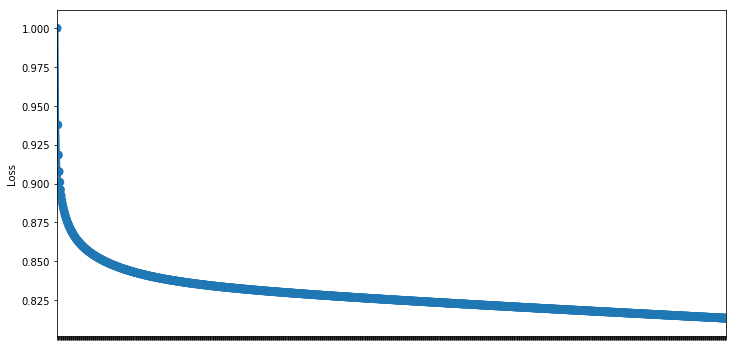

1000

In [235]:
# Your code here
w, loss = grad_descent(X_sub, y_sub,  step_size=0.001,max_iter=1000, is_reg=False, plot=True)
len(loss)

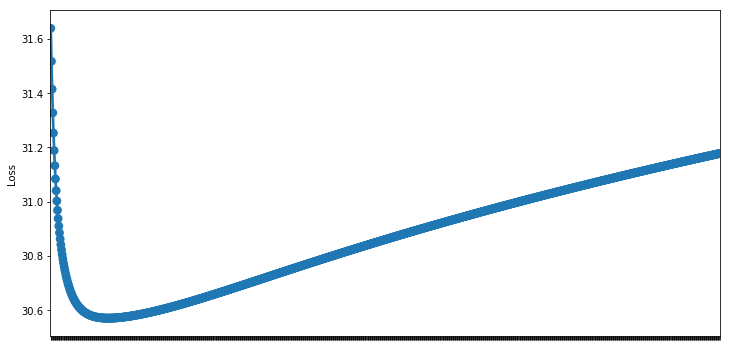

Median loss:  30.8705189358
Number of iterations:  1000
Minimum loss:  30.5703073012
Convergence time: 8.793868780136108 seconds
СЛУЧАЙНЫЕ ВЕСА


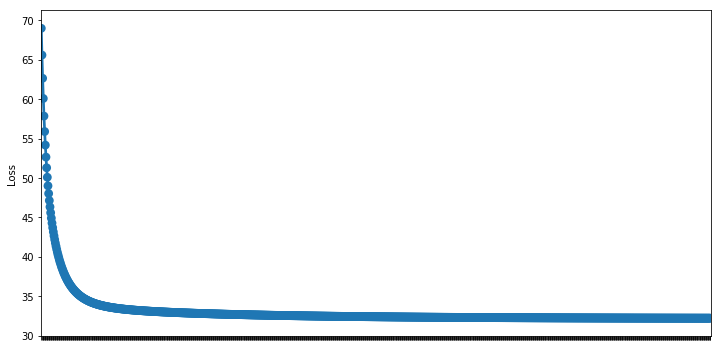

Median loss:  32.4139242345
Number of iterations:  1000
Minimum loss:  32.2323217827
Convergence time: 16.187817096710205 seconds


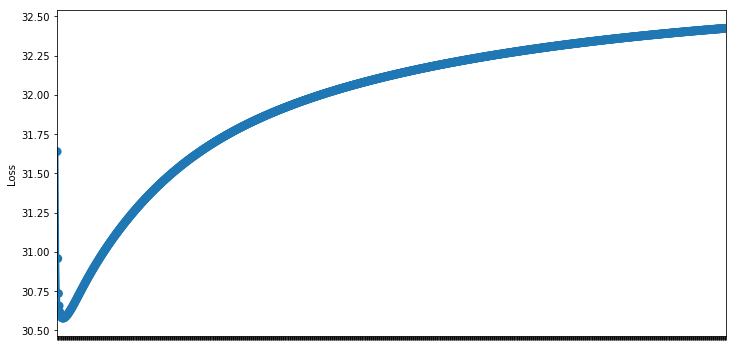

Median loss:  32.125036577
Number of iterations:  1000
Minimum loss:  30.5771884077
Convergence time: 8.251086473464966 seconds
СЛУЧАЙНЫЕ ВЕСА


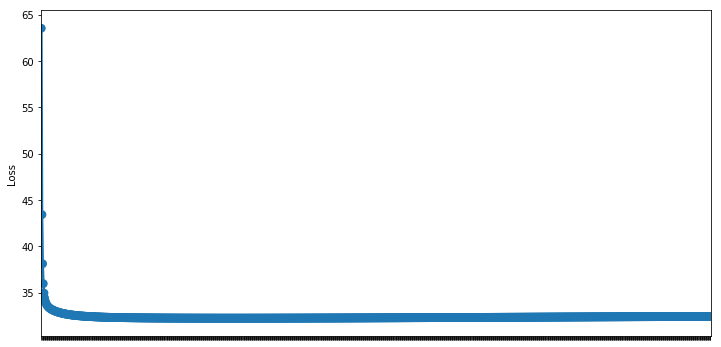

Median loss:  32.3183559321
Number of iterations:  1000
Minimum loss:  32.249556182
Convergence time: 16.675551176071167 seconds
explosion


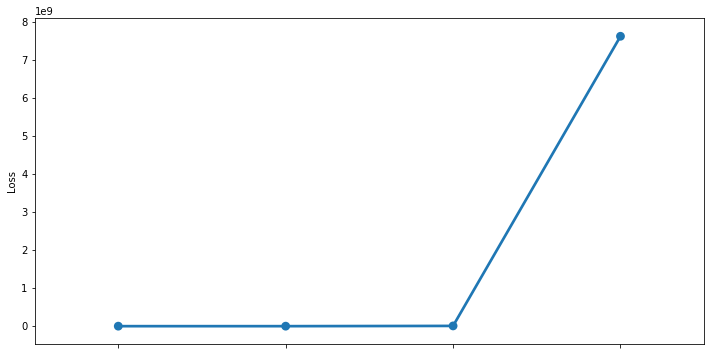

Median loss:  3369876.75211
Number of iterations:  4
Minimum loss:  31.6385840391
Convergence time: 0.3308713436126709 seconds
СЛУЧАЙНЫЕ ВЕСА
explosion


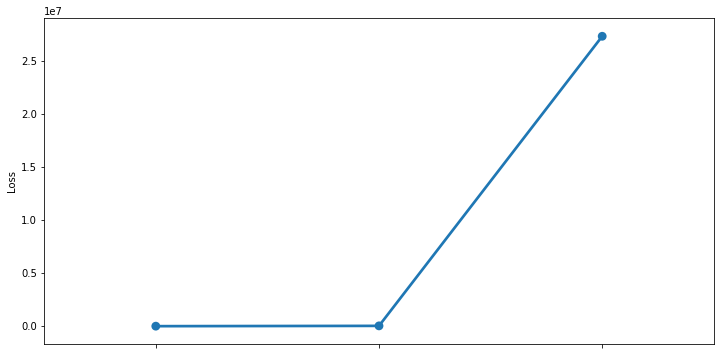

Median loss:  28270.5944369
Number of iterations:  3
Minimum loss:  58.5007362082
Convergence time: 0.5708756446838379 seconds


In [236]:
lr_set = [0.0001, 0.001, 1]
import time
for i in lr_set:
    start_time = time.time()
    plt.figure(i)
    iters=1000
    w, loss = grad_descent(X_sub, y_sub, step_size=i,max_iter=iters, is_reg=True, plot=True);
    print('Median loss: ', np.median(loss))
    print('Number of iterations: ', len(loss))
    print('Minimum loss: ', min(loss))
    print('Convergence time: %s seconds' % (time.time() - start_time))
    print('СЛУЧАЙНЫЕ ВЕСА')
    w, loss = grad_descent(X_sub, y_sub, w0=np.random.sample(X_sub.shape[1]), step_size=i,max_iter=iters, is_reg=True, plot=True);
    print('Median loss: ', np.median(loss))
    print('Number of iterations: ', len(loss))
    print('Minimum loss: ', min(loss))
    print('Convergence time: %s seconds' % (time.time() - start_time))

**Градиентный спуск с шагом 1 не сходится, а, по-видимому, перешагивает минимум и ошибка тем более не сходится с шагом 10, поэтому для сравнения скорости сходимости был взят шаг 0.0001. Не совсем понятно, почему при начальном значении весов равных нулям градиент убывает, а затем растет.**

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

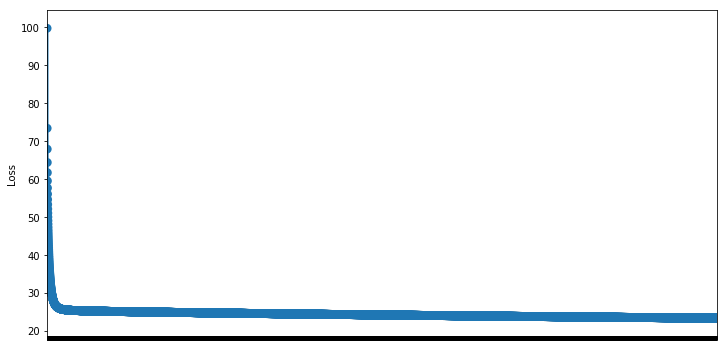

10000
Convergence time: 125.79607820510864 seconds


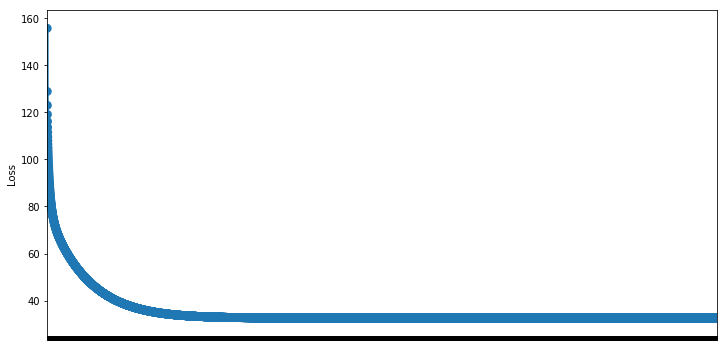

7994
Convergence time: 91.5658848285675 seconds


In [136]:
# Your code here
is_reg = [False, True]
for reg in is_reg:
    start_time = time.time()
    w, loss = grad_descent(X_sub, y_sub, w0=rcv.coef_, step_size=0.001,max_iter=10000, is_reg=reg, plot=True);
    print(len(loss))
    print('Convergence time: %s seconds' % (time.time() - start_time))
    

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [241]:
def sgd(X, y, w0=None, step_size=0.01, max_iter=1000, eps=1e-5, is_reg=True, plot=False, batch_size=10):
    np.seterr(all='warn')
    X_backup=X.copy()
    y_backup=y.copy()
    try:
        w0.size
    except:
        w0 = np.zeros(X.shape[1])
    w_t = w0
    loss = []
    iters = []
    if is_reg:
        for i in range(max_iter):
            X = X_backup.copy()
            y = y_backup.copy()
            idx = np.random.randint(1,len(y),size=batch_size)
            X = X[idx,]
            y = y[idx]
            if get_reg_func(w_t, X, y) >1e+10:
                print('explosion')
                break
            loss.append(get_reg_func(w_t, X, y))
            iters.append(i)
            grad_t = get_reg_grad(w_t, X, y)
            if np.linalg.norm(grad_t)<eps:
                break
            w_t = w_t-step_size*grad_t
    else:
        for i in range(max_iter):
            X = X_backup.copy()
            y = y_backup.copy()
            idx = np.random.randint(1,len(y),size=batch_size)
            X = X[idx,]
            y = y[idx]
            if get_func(w_t, X, y) >1e+10:
                print('explosion')
                break
            loss.append(get_func(w_t, X, y))
            iters.append(i)
            grad_t = get_grad(w_t, X, y)
            if np.linalg.norm(grad_t)<eps:
                break
            w_t = w_t-step_size*grad_t
    if plot:
        plt.subplots(figsize=(12,6))
        g = sns.pointplot(x=iters, y=loss)
        plt.xlabel("")
        plt.ylabel("Loss")
        plt.xticks(rotation=90)
        g.set(xticklabels=[])
        plt.show();
    return w_t, loss
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

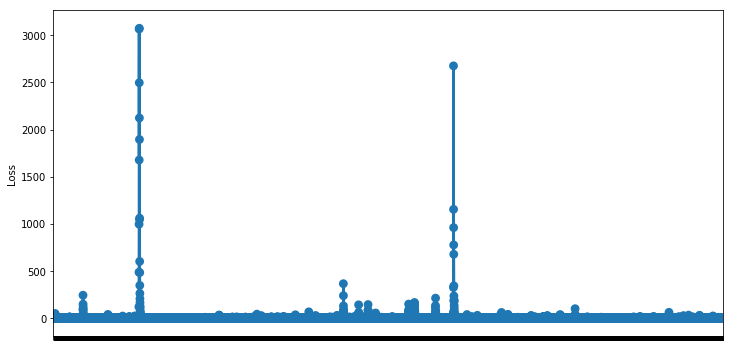

In [242]:
# Your code here
w, loss = sgd(X_sub, y_sub, step_size=0.05,max_iter=10000, is_reg=True, plot=True);

In [246]:
y_mspe_pred = make_pred(X_test, w)
print('MSPE: ', get_func(w, X_test, y_test))

MSPE:  1.01672330004


In [248]:
print("Mean squared error on test: %.2f"
      % mean_squared_error(y_test, y_mspe_pred))
print('Variance score on test: %.2f' % r2_score(y_test, y_mspe_pred))

Mean squared error on test: 1551.54
Variance score on test: -0.09


**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

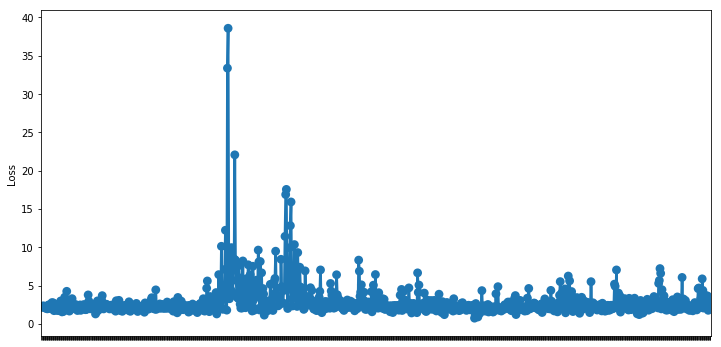

1000
Convergence time: 6.846858739852905 seconds


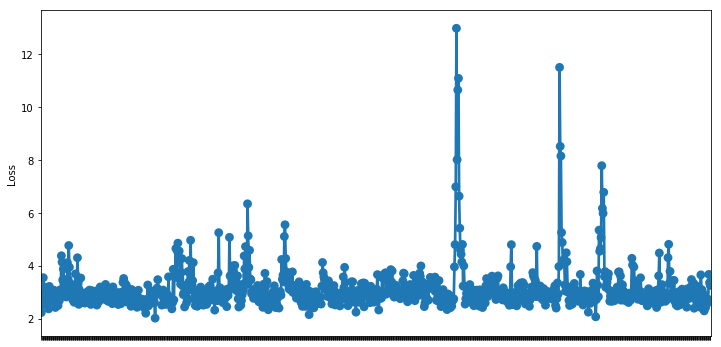

1000
Convergence time: 9.614546537399292 seconds


In [215]:
# Your code here
# Your code here
is_reg = [False, True]
for reg in is_reg:
    start_time = time.time()
    w, loss = sgd(X_sub, y_sub, step_size=0.05,max_iter=10000, is_reg=reg, plot=True, batch_size=5);
    print(len(loss))
    print('Convergence time: %s seconds' % (time.time() - start_time))
    

**С регуляризацией считается дольше, так как вычислений больше**

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [251]:
# Your code here
print('MSPE: ', get_func(lr.coef_, X_test, y_test))

MSPE:  9.91957879794e+26


**Loss больше, так как оптимизировалась другая функция потерь**

Ссылки 
https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely
https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
https://stackoverflow.com/questions/29661574/normalize-numpy-array-columns-in-python
https://stackoverflow.com/questions/39409866/correlation-heatmap
https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
https://stackoverflow.com/questions/20241205/how-does-sklearn-lassocv-perform-cross-validation
https://stackoverflow.com/questions/21998354/pandas-wont-fillna-inplace
https://stackoverflow.com/questions/33405219/concatenating-numpy-vector-and-matrix-horizontally
https://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution
https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution
http://ozzieliu.com/2016/02/09/gradient-descent-tutorial/